# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

## Parte 1

### _Setup_ da parte 1

In [3]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [4]:
# Sua análise da parte 1 começa aqui.
df = dataframe.sort_values(['normal', 'binomial'], ascending=[True,True])

In [5]:
df.head()

,normal,binomial
9770,4.310399,18
8200,4.653378,25
7611,5.246539,13
7677,5.595660,21
8180,7.033945,20


In [6]:
    q1_norm = df['normal'].quantile(0.25).round(3)
    q2_norm = df['normal'].quantile(0.50).round(3)
    q3_norm = df['normal'].quantile(0.75).round(3)

    q1_binom = df['binomial'].quantile(0.25).round(3)
    q2_binom = df['binomial'].quantile(0.50).round(3)
    q3_binom = df['binomial'].quantile(0.75).round(3)

In [7]:
tuple(np.round([q1_norm - q1_binom, q2_norm - q2_binom, q3_norm - q3_binom], 3))

(0.31, -0.01, -0.316)

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [8]:
def q1():
    # Retorne aqui o resultado da questão 1.
    
    q1_norm = df['normal'].quantile(0.25).round(3)
    q2_norm = df['normal'].quantile(0.50).round(3)
    q3_norm = df['normal'].quantile(0.75).round(3)

    q1_binom = df['binomial'].quantile(0.25).round(3)
    q2_binom = df['binomial'].quantile(0.50).round(3)
    q3_binom = df['binomial'].quantile(0.75).round(3)
    
    return tuple(np.round([q1_norm - q1_binom, q2_norm - q2_binom, q3_norm - q3_binom], 3))
    pass

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

# Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [9]:
def q2(n_sigma = 1):
    # Retorne aqui o resultado da questão 2.
    mean = df["normal"].mean()
    std = df["normal"].std()    
    
    lower, upper = mean - n_sigma * std, mean + n_sigma * std
    
    cdf_empirical = ECDF(df["normal"]) 
    
    return np.float(np.round(cdf_empirical(upper) - cdf_empirical(lower), 3))
    pass

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [10]:
def q3():
    # Retorne aqui o resultado da questão 3.
    m_norm = df['normal'].mean()
    v_norm = df['normal'].var()
    
    m_binom = df['binomial'].mean()
    v_binom = df['binomial'].var()
    
    return tuple(np.round([m_binom - m_norm, v_binom - v_norm], 3))
    pass

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

* Para maiores *n* a binomial se aproxima da normal, portanto as diferencas diminuem. 

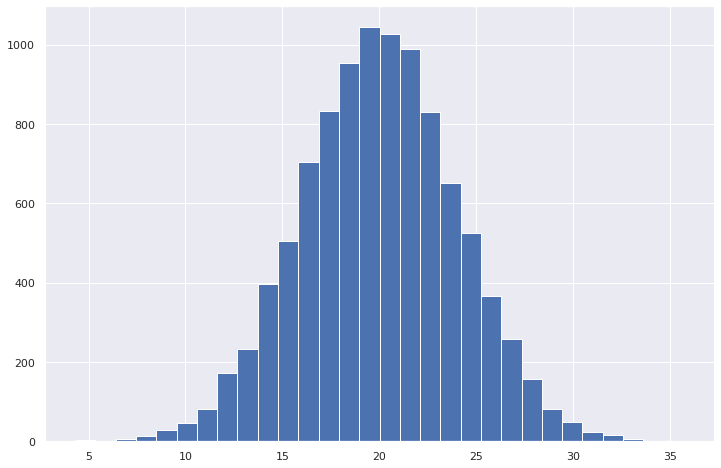

In [11]:
normal_data = df['normal']
pd.Series(normal_data).hist(bins=30);

## Parte 2

### _Setup_ da parte 2

In [21]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [27]:
# Sua análise da parte 2 começa aqui.
stars.shape

(17897, 9)

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF 
empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [39]:
def q4():
    # Retorne aqui o resultado da questão 4.
    not_pulsar = stars.query("target == 0")["mean_profile"]

    not_pulsar_standard = (not_pulsar - not_pulsar.mean()) / not_pulsar.std()

    ecdf = ECDF(not_pulsar_standard)

    quantile_80, quantile_90, quantile_95 = sct.norm.ppf([0.8, 0.9, 0.95], loc=0, scale=1)

    return round(ecdf(quantile_80), 3), round(ecdf(quantile_90), 3), round(ecdf(quantile_95), 3)
    pass

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5


Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [42]:
def q5():
    # Retorne aqui o resultado da questão 5.
    
    not_pulsar = stars.query("target == 0")["mean_profile"]

    not_pulsar_standard = (not_pulsar - not_pulsar.mean()) / not_pulsar.std()

    not_pulsar_25, not_pulsar_mean, not_pulsar_75 = not_pulsar_standard.quantile([0.25, 0.5, 0.75])

    normal_25,normal_mean,normal_75 = sct.norm.ppf([0.25, 0.5, 0.75], loc=0, scale=1)

    difference = tuple(np.round([not_pulsar_25 - normal_25, not_pulsar_mean - normal_mean, not_pulsar_75 - normal_75], 3))

    return(difference)
    pass

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.